--- Initial Data Snapshot ---
   Order_ID  Order_Date  Product     Category   Price  Quantity    City
0       101  2025-01-10   Laptop  Electronics  1200.0         1  Jaipur
1       102  2025-01-12    Mouse  Electronics    25.0         2   Delhi
2       103  2025-02-15  Monitor  Electronics   300.0         1  Mumbai
3       104  2025-03-20      CPU  Electronics     NaN         1  Jaipur
4       105  2025-03-22   Laptop  Electronics  1200.0         1   Delhi
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_ID    10 non-null     int64  
 1   Order_Date  10 non-null     object 
 2   Product     10 non-null     object 
 3   Category    10 non-null     object 
 4   Price       9 non-null      float64
 5   Quantity    10 non-null     int64  
 6   City        10 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 692.0+ bytes
N

/var/folders/8b/035mflmn4bbbf4dr13y_0qx40000gn/T/ipykernel_57111/4263513230.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_performance.index, y=city_performance.values, palette='viridis')


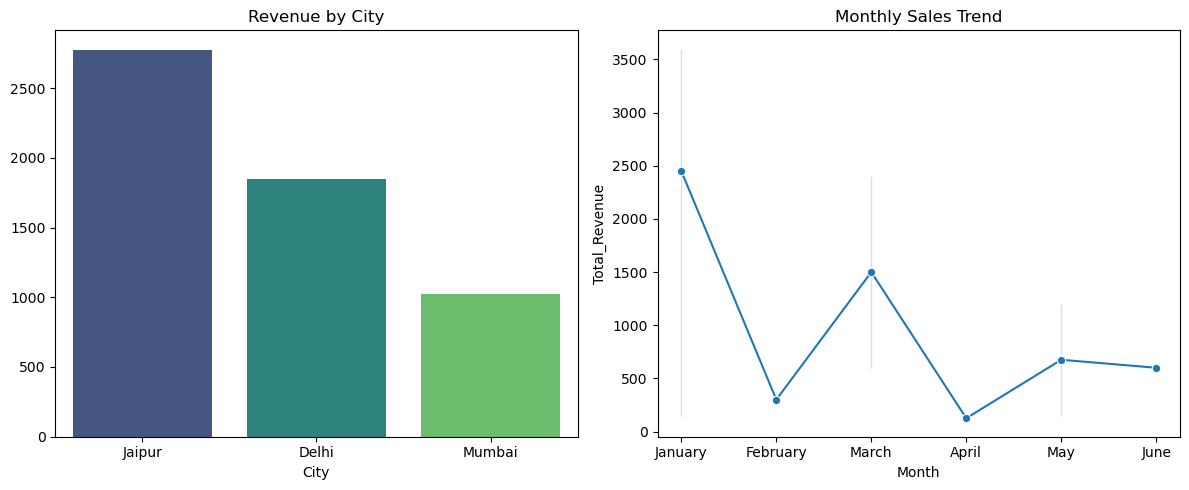

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD & INSPECT
df = pd.read_csv('ecommerce_data.csv')
print("--- Initial Data Snapshot ---")
print(df.head())
print(df.info())

# 2. DATA CLEANING (The 'Dirty' Work)
# Handle Missing Values in Price with Median (more robust than mean)
df['Price'] = df['Price'].fillna(df['Price'].median())

# Remove Duplicates (Row 1 and 9 are duplicates in our mock data)
print(f"\nRows before cleaning: {len(df)}")
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df)}")

# Convert Date
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# 3. FEATURE ENGINEERING
df['Total_Revenue'] = df['Price'] * df['Quantity']
df['Month'] = df['Order_Date'].dt.month_name()

# 4. DEEP-DIVE ANALYSIS (This makes it 'Project Grade')
# A. Descriptive Statistics
print("\n--- Sales Statistics ---")
print(df['Total_Revenue'].describe())

# B. Identifying Top Customers/Cities
city_performance = df.groupby('City')['Total_Revenue'].sum().sort_values(ascending=False)

# C. Product Popularity
product_rank = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

# 5. DATA VISUALIZATION
plt.figure(figsize=(12, 5))

# Plot 1: Revenue by City
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.barplot(x=city_performance.index, y=city_performance.values, palette='viridis')
plt.title('Revenue by City')

# Plot 2: Monthly Trend
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.lineplot(x=df['Month'], y=df['Total_Revenue'], estimator='sum', marker='o')
plt.title('Monthly Sales Trend')

plt.tight_layout()
plt.show()